## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [91]:
#Tensorflow 설치하기


* 데이터 프레임 관련 라이브러리

In [58]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings


warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### **나.  학습데이터 불러오기**

In [6]:
train_x=pd.read_csv("train_x.csv",index_col=0)
test_x=pd.read_csv("test_x.csv",index_col=0)
train_y=pd.read_csv("train_y.csv",index_col=0)
test_y=pd.read_csv("test_y.csv",index_col=0)
train_x=train_x.reset_index()
test_x=test_x.reset_index()
train_y=train_y.reset_index()
test_y=test_y.reset_index()
principal = pd.read_csv("principalDF.csv")

In [81]:
principal = pd.read_csv("principalDF.csv")
principal = principal.drop("Unnamed: 0",axis=1)
principal

,pc1,label
0,-66.186574,1.0
1,-45.150037,0.0
2,3.906185,0.0
3,-11.157089,0.0
4,254.809549,0.0
...,...,...
3657,-63.249305,1.0
3658,408.833471,0.0
3659,36.823467,1.0
3660,-63.209711,0.0


In [14]:
train_x

,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,1.0,26.0,3.0,0.0,0.0,4.287866,0.0,2.0,0.0,1.0,1.0,1.0,16.0
1,0.0,23.0,6.0,0.0,1.0,4.656391,0.0,4.0,0.0,1.0,1.0,1.0,1.0
2,2.0,28.0,1.0,0.0,0.0,4.308271,0.0,24.0,0.0,1.0,1.0,5.0,219.0
3,0.0,15.0,2.0,0.0,0.0,4.808986,1.0,8.0,1.0,1.0,1.0,1.0,119.0
4,0.0,9.0,2.0,2.0,0.0,4.167897,0.0,4.0,0.0,1.0,1.0,1.0,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,0.0,14.0,2.0,0.0,0.0,3.995715,0.0,7.0,0.0,1.0,1.0,1.0,198.0
2925,1.0,17.0,2.0,0.0,0.0,4.079679,0.0,2.0,0.0,1.0,1.0,1.0,0.0
2926,0.0,8.0,2.0,0.0,0.0,4.445132,0.0,10.0,0.0,1.0,1.0,1.0,51.0
2927,1.0,21.0,2.0,0.0,0.0,4.284901,0.0,2.0,0.0,1.0,1.0,1.0,92.0


In [21]:
# train_x = train_x.drop("index",axis=1)
# test_x = test_x.drop("index",axis=1)
# train_y = train_y.drop("index",axis=1)
# test_y = test_y.drop("index",axis=1)

In [15]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((2929, 13), (733, 13), (2929, 1), (733, 1))

### **다.  데이터 전처리**

In [82]:
from sklearn.model_selection import train_test_split
x1=principal.drop("label",axis=1)
y1=principal[["label"]]

In [83]:
train_x1,test_x1,train_y1,test_y1 = train_test_split(x1,y1,test_size=0.3,random_state=2021)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state=2021)
params={"max_depth":range(5,31),"n_estimators":[100,200,300]}
model1 = GridSearchCV(model,params,cv=5,scoring="accuracy",n_jobs=-1)
model1.fit(train_x1,train_y1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 31),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [85]:
print(model1.best_params_)
print(model1.best_score_) 

{'max_depth': 17, 'n_estimators': 100}
0.8525188840155945


In [90]:
from sklearn.linear_model import LogisticRegression
model7=LogisticRegression(max_iter=500,random_state=2021)
model7.fit(train_x1,train_y1)
y_pred_log = model7.predict(test_x1)
print(accuracy_score(test_y1,y_pred_log))
confusion_matrix(test_y1,y_pred_log)

0.6733393994540491


array([[260, 298],
       [ 61, 480]], dtype=int64)

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [1]:
# train_test_split 사용


### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [1]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [73]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation=90, fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


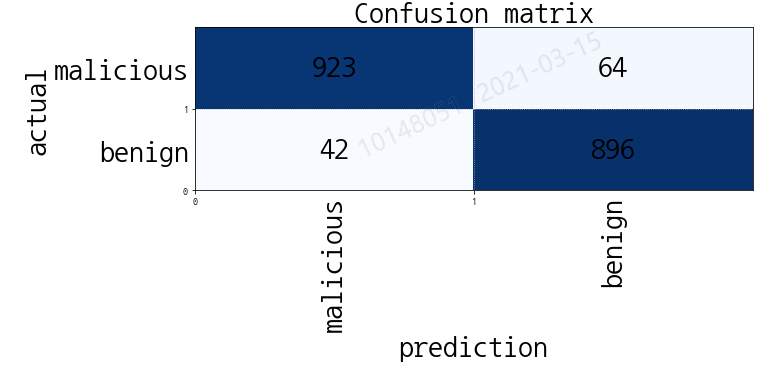

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [16]:
# 1. import
from sklearn.ensemble import RandomForestClassifier


In [17]:
# 2.선언 
model = RandomForestClassifier()


In [18]:
# 3. fit(), 학습
model.fit(train_x,train_y)


C:\Users\dufwn\AppData\Local\Temp\ipykernel_11148\3660914646.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x,train_y)


RandomForestClassifier()

In [19]:
# 4. predict(), 예측
y_pred_rf = model.predict(test_x)

In [31]:
# train 및 val 데이터 정확도 확인 
from sklearn.model_selection import cross_val_score
cv_score_3 = cross_val_score(model,train_x,train_y,cv=10)
print(cv_score_3)
print('평균:', cv_score_3.mean())
print('표준편차:', cv_score_3.std())

[0.96928328 0.95221843 0.92150171 0.94197952 0.94880546 0.92150171
 0.92491468 0.97269625 0.94880546 0.93493151]
평균: 0.9436637991490953
표준편차: 0.017430524080833697


In [56]:
confusion = confusion_matrix(test_y,y_pred_rf)
print(confusion_matrix(test_y,y_pred_rf))
accuracy_score(test_y,y_pred_rf)


[[355  18]
 [ 22 338]]


0.9454297407912687

In [63]:
# classification_report(test_y,y_pred_rf)
# accuracy_score(test_y,y_pred_rf)
classification_report(test_y,y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.94      0.95      0.95       373\n           1       0.95      0.94      0.94       360\n\n    accuracy                           0.95       733\n   macro avg       0.95      0.95      0.95       733\nweighted avg       0.95      0.95      0.95       733\n'

In [60]:
# Test 데이터 결과 Confusion Matrix 확인
# fig, ax = plt.subplots(figsize=(10,3))
# plot_confusion_matrix(ax, confusion, fontsize=30)


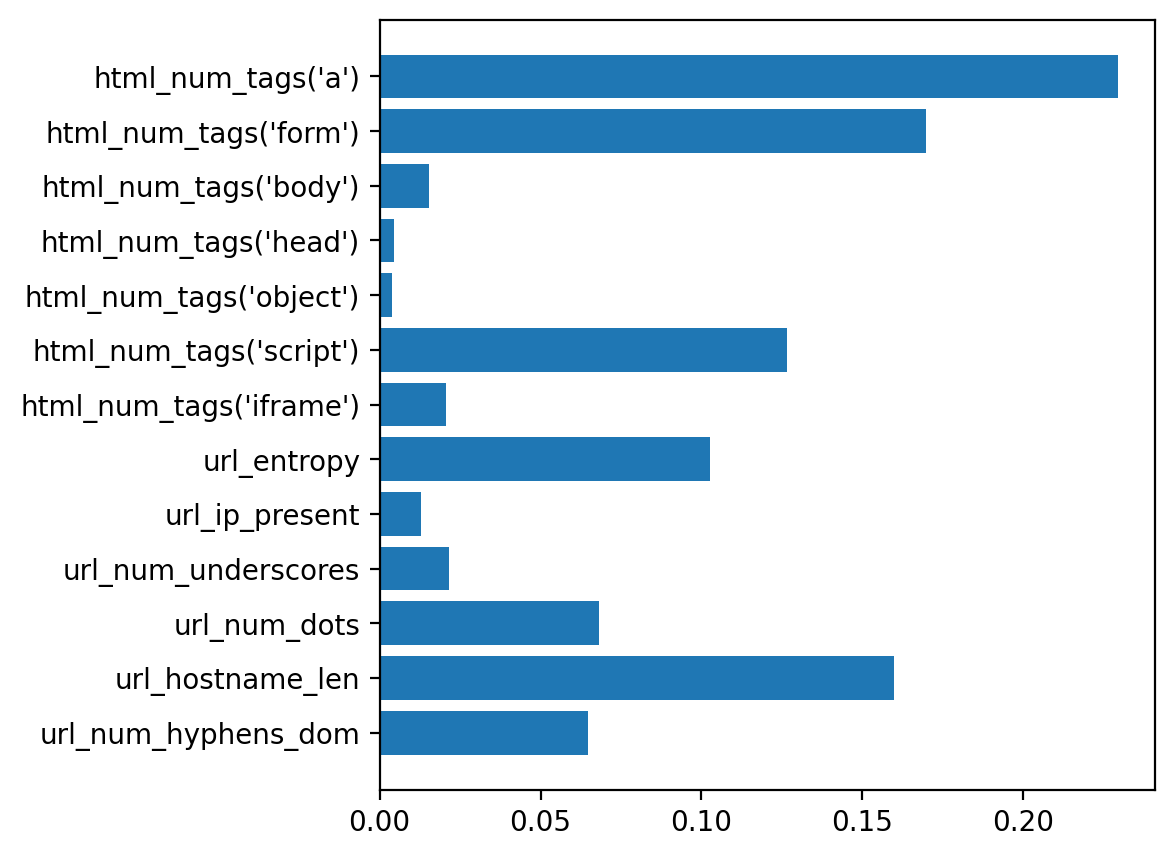

In [36]:
# Feature(특징)별 가중치 확인
plt.figure(figsize=(5, 5))
plt.barh(y=list(train_x), width=model.feature_importances_)
plt.show()


In [48]:
a=pd.DataFrame(data=list(train_x),columns=['feature'])
a["가중치"] = model.feature_importances_
a.sort_values("가중치",ascending=False)


,feature,가중치
12,html_num_tags('a'),0.229296
11,html_num_tags('form'),0.169607
1,url_hostname_len,0.159675
7,html_num_tags('script'),0.126692
5,url_entropy,0.102806
2,url_num_dots,0.068217
0,url_num_hyphens_dom,0.064757
3,url_num_underscores,0.021476
6,html_num_tags('iframe'),0.020739
10,html_num_tags('body'),0.015480


In [49]:
from xgboost import XGBClassifier
model1 = XGBClassifier()
model1.fit(train_x,train_y)
y_pred_xgb=model1.predict(test_x)

In [50]:
cv_score_4 = cross_val_score(model1,train_x,train_y,cv=10)
print(cv_score_4)
print('평균:', cv_score_4.mean())
print('표준편차:', cv_score_4.std())

[0.96245734 0.93856655 0.92150171 0.93174061 0.94197952 0.91467577
 0.93174061 0.9556314  0.95221843 0.94178082]
평균: 0.93922927673103
표준편차: 0.014216559571181429


In [51]:
confusion = confusion_matrix(test_y,y_pred_xgb)
confusion_matrix(test_y,y_pred_xgb)

array([[348,  25],
       [ 21, 339]], dtype=int64)

In [65]:
print(accuracy_score(test_y,y_pred_xgb))
classification_report(test_y,y_pred_xgb)

0.937244201909959


'              precision    recall  f1-score   support\n\n           0       0.94      0.93      0.94       373\n           1       0.93      0.94      0.94       360\n\n    accuracy                           0.94       733\n   macro avg       0.94      0.94      0.94       733\nweighted avg       0.94      0.94      0.94       733\n'

In [52]:
from lightgbm import LGBMClassifier
model2 = XGBClassifier()
model2.fit(train_x,train_y)
y_pred_lgb=model2.predict(test_x)

In [53]:
cv_score_5 = cross_val_score(model2,train_x,train_y,cv=10)
print(cv_score_5)
print('평균:', cv_score_5.mean())
print('표준편차:', cv_score_5.std())

[0.96245734 0.93856655 0.92150171 0.93174061 0.94197952 0.91467577
 0.93174061 0.9556314  0.95221843 0.94178082]
평균: 0.93922927673103
표준편차: 0.014216559571181429


In [54]:
confusion = confusion_matrix(test_y,y_pred_xgb)
confusion_matrix(test_y,y_pred_xgb)

array([[348,  25],
       [ 21, 339]], dtype=int64)

In [66]:
print(accuracy_score(test_y,y_pred_lgb))
classification_report(test_y,y_pred_lgb)

0.937244201909959


'              precision    recall  f1-score   support\n\n           0       0.94      0.93      0.94       373\n           1       0.93      0.94      0.94       360\n\n    accuracy                           0.94       733\n   macro avg       0.94      0.94      0.94       733\nweighted avg       0.94      0.94      0.94       733\n'

In [69]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(train_x)
train_x_scal = scale.transform(train_x)
test_x_scal = scale.transform(test_x)

from sklearn.svm import SVC
model3 = SVC()
model3.fit(train_x_scal,train_y)
y_pred_svm=model3.predict(test_x_scal)

In [70]:
cv_score_6 = cross_val_score(model3,train_x_scal,train_y,cv=10)
print(cv_score_6)
print('평균:', cv_score_6.mean())
print('표준편차:', cv_score_6.std())

[0.89761092 0.8668942  0.83959044 0.88395904 0.88737201 0.88054608
 0.87713311 0.87372014 0.88054608 0.87671233]
평균: 0.8764084342419001
표준편차: 0.014542788461692536


In [71]:
confusion_matrix(test_y,y_pred_svm)

array([[330,  43],
       [ 51, 309]], dtype=int64)

In [72]:
print(accuracy_score(test_y,y_pred_svm))
classification_report(test_y,y_pred_svm)

0.8717598908594816


'              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.88       373\n           1       0.88      0.86      0.87       360\n\n    accuracy                           0.87       733\n   macro avg       0.87      0.87      0.87       733\nweighted avg       0.87      0.87      0.87       733\n'

In [ ]:
# 다중공선성에서 제거해야할 것 b=["label","url_len","url_domain_len","url_entropy","html_num_tags('head')"]
# 카이제곱분석에서 제거해야할것(p-value유의하지않은것) ["url_chinese_present",'url_port']
# 로지스틱 분석회귀에서 제거해야할것(p-value유의하지않은것) "html_num_tags('applet')","url_num_query_para","url_len","url_query_len","html_num_tags('div')","html_num_tags('embed')","url_path_len"
# ["url_len","html_num_tags('applet')","url_chinese_present",'url_port',"html_num_tags('div')","html_num_tags('embed')","url_num_query_para"]